In [1]:
import numpy as np
import matplotlib.pyplot as plt

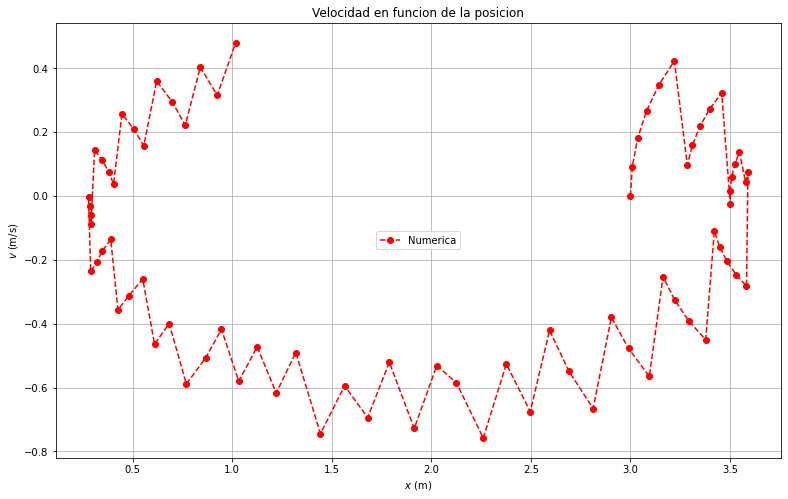

In [2]:
#Constantes
h = 0.2 # Pasos
miu = 0.2
m = 1
g = 9.8
k = 0.5

#Condiciones iniciales
x0 = 3 
v0 = 0 #m/s
t = np.arange(0, 15 + h, h) 
v_po = 0.5 #m/s
w_b = 0.4
v_p = lambda t: v_po*np.cos(w_b*t)

#Asignacion de condiciones iniciales
x_oa = np.zeros(len(t))
v_oa = np.zeros(len(t))

x_oa[0] = x0
v_oa[0] = v0

#Funcion de aceleracion
def a(t, v, x):
    if (v_p(t)>v):
        return miu*m*g - k*x
    else:
        return -miu*m*g - k*x



#Resolucion de la ED
for i in range(0, len(t) - 1):
    k1v = h*a(t[i], v_oa[i], x_oa[i]) 
    k1x = h*v_oa[i] 
    k2v = h*a(t[i] + 0.5*h, v_oa[i] + 0.5*k1v, x_oa[i] + 0.5*k1x)
    k2x = h*(v_oa[i] + 0.5*k1v)
    k3v = h*a(t[i] + 0.5*h, v_oa[i] + 0.5*k2v, x_oa[i] + 0.5*k2x)
    k3x = h*(v_oa[i] + 0.5*k2v)
    k4v = h*a(t[i] + h, v_oa[i] + k3v, x_oa[i] + k3x)
    k4x = h*(v_oa[i] + k3v)
    v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

#Grafica
plt.figure(figsize = (13, 8))
plt.plot(x_oa, v_oa, 'ro--', label='Numerica')

plt.title('Velocidad en funcion de la posicion')
plt.xlabel('$x$ (m)')
plt.ylabel('$v$ (m/s)')
plt.grid()
plt.legend(loc='center')
plt.savefig("sistema.png")
plt.show()

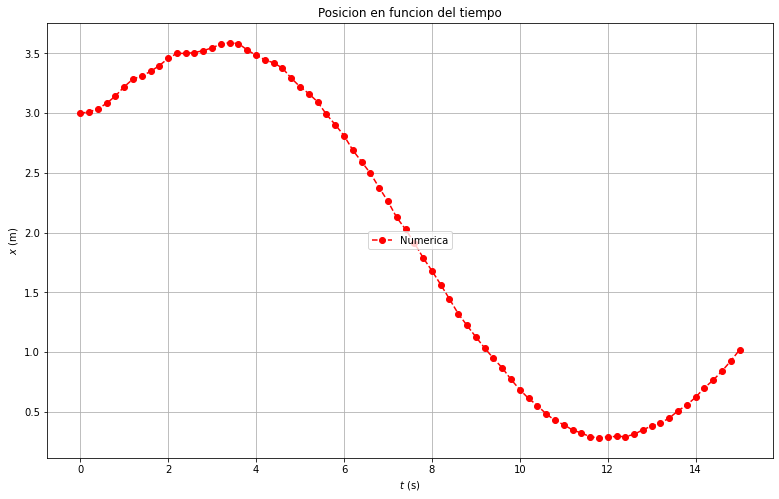

In [3]:
#Grafica
plt.figure(figsize = (13, 8))
plt.plot(t, x_oa, 'ro--', label='Numerica')

plt.title('Posicion en funcion del tiempo')
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.grid()
plt.legend(loc='center')
plt.savefig("pos.png")
plt.show()

In [4]:
h=0.01
t = np.arange(0,100+h,h)
a = 1 #m
G = 6.9e-11
M = 500000000 #Kg
v_o = 1 #m/s

def x(t):
    b = (2*G*M)/(a**3)
    c1 = a*(a+3)
    c2 = v_o*(a**3)/(2*G*M)
    return c1*np.cos(b*t)+c2*np.sin(b*t)-(a**2)

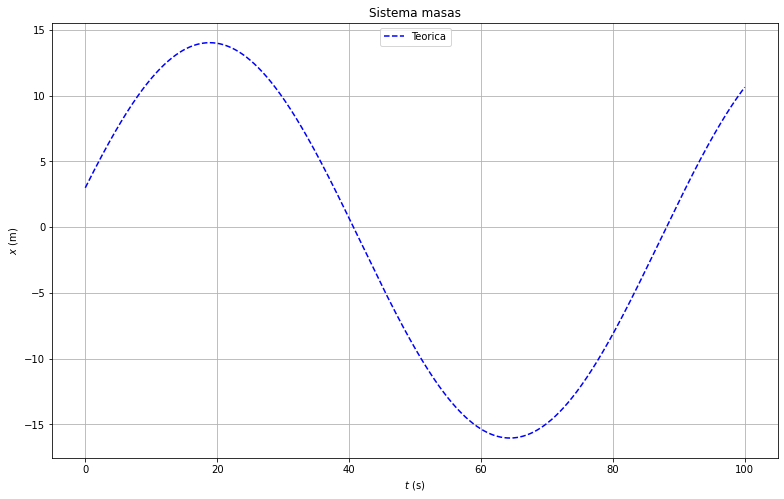

In [6]:
plt.figure(figsize = (13, 8))
plt.plot(t, x(t), 'b--', label='Teorica')
plt.title('Sistema masas')
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.grid()
plt.legend(loc='upper center')
plt.savefig("masas.png")
plt.show()